#Klasyfikacja Gaussowskim i wielomianowym klasyfikatorami Bayesowskimi i SVC opartymi o reprezentacje zliczające tokeny (Baf of Words i Bag of n-grams)

Ten plik pozwala na seryjne testowanie klasyfikatorów i pozyskanie wyników (w formacie tabeli latexowych i macierzy pomyłek) dla określonych zbiorów zapisanych w formacie pickle. Uruchomienie wszsytkich komórek z notatnika powoduje wygenerowanie wyników dla wszystkich okreśonych zbiorów zapamiętanych w formacie pickle.

### Działania przygotowawcze: podłączenie Dysku Google, instalacja wymaganych pakietów, dołączenie katalogu projektu do ścieżki systemowej i import potrzebnych klas z projektu

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# ścieżka do bieżącego katalogu (należy edytować, jeśli się nie zgadza)
%cd gdrive/MyDrive/praca_inzynierska/authorship_analysis_project/training_models

Mounted at /content/gdrive
/content/gdrive/MyDrive/praca_inzynierska/authorship_analysis_project/training_models


In [ ]:
! pip install -r ../requrements.txt
! pip install https://github.com/kpu/kenlm/archive/master.zip
! python -m spacy download pl_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 553.5 kB 8.3 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.1 MB/s eta 0:00:00
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=552c5

In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
print(sys.path)

/content/gdrive/MyDrive/praca_inzynierska/authorship_analysis_project
['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/gdrive/MyDrive/praca_inzynierska/authorship_analysis_project']


In [ ]:
from data_preparation import CorpusPreparation
from pipelines import Pipeline, Explain
from data_fetchers import EpochsFetcher, BookSet

/usr/local/lib/python3.10/dist-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


### Zbiory treningowe i testowe

Lista dostępnych zbiorów zapisanych jako pickle. Zbiory oznaczone są liczbami naturalnymi i cyfra dziesiątek oznacza sposób podziału zbioru na zbiory testowe i uczące z określoną liczbą słów w próbce, a cyfra jednosci oznacza wybrany preprocessing.

In [ ]:
import pickle
from os.path import exists
datasets_filepath = 'datasets/features_'
for i in range(100):
  path = datasets_filepath + str(i)
  if exists(path):
    print(path)
    with open(path, 'rb') as f:
      data = pickle.load(f)
      head_data, _, _, _, _ = data
      print(f'test_size: {head_data[0]}, train_size: {head_data[1]}, number of words in paragraph: {head_data[2]}, preprocessing operations: {head_data[3]}, authors: {head_data[4]}')

datasets/features_0
test_size: 20, train_size: 100, number of words in paragraph: 15, preprocessing operations: ['anonymize'], authors: ['Daniel Naborowski', 'Mikołaj Sęp Szarzyński', 'Elżbieta Drużbacka', 'Adam Mickiewicz', 'Juliusz Słowacki', 'Cyprian Kamil Norwid', 'Adam Asnyk', 'Maria Konopnicka', 'Kazimierz Przerwa-Tetmajer', 'Bolesław Leśmian', 'Jan Kasprowicz']
datasets/features_1
test_size: 20, train_size: 100, number of words in paragraph: 15, preprocessing operations: ['anonymize', 'lower_text', 'remove_stop_words'], authors: ['Daniel Naborowski', 'Mikołaj Sęp Szarzyński', 'Elżbieta Drużbacka', 'Adam Mickiewicz', 'Juliusz Słowacki', 'Cyprian Kamil Norwid', 'Adam Asnyk', 'Maria Konopnicka', 'Kazimierz Przerwa-Tetmajer', 'Bolesław Leśmian', 'Jan Kasprowicz']
datasets/features_2
test_size: 20, train_size: 100, number of words in paragraph: 15, preprocessing operations: ['anonymize'], authors: ['Daniel Naborowski', 'Mikołaj Sęp Szarzyński', 'Elżbieta Drużbacka', 'Adam Mickiewicz'

### Określenie rodzajów preprocessingu i wybór zbiorów, deklaracja zmiennych

In [ ]:
preps_num = [0,1,2,3,5] # wybór preprocessingu
preps_descr = ['a', 'als', 'alo_NVAdj', 'alp', 'alsp', 'alomp_NVAdj']
div_num= [5,7]#[0,1,2,3,4,5,6,7] # wybór numeru podziału zbioru z wielkością próbki
number_of_dataset = 0

mixed = None
test_size = None
train_size = None
words_num_in_par = None
representations = ['bo3'] # 'bow', 'bo2', 'bo3'
models= ['mnb'] # 'cnb, 'svc', gnb'
authors = []
preprocessing_list = []
train_classes = []
prep_descr = ''
kinds_descr = ''
latex_set_str = ''


### Definicje funkcji

In [ ]:
def get_books_epoch_list():
  print(authors)
  bookset = BookSet()
  bookset.fetch()
  if authors == ['Eliza Orzeszkowa', 'Henryk Sienkiewicz', 'Bolesław Prus']:
    kinds =['Epika']
    books_list = bookset.list_of_books_to_author_title_list(bookset.get_books_by_authors_list_kinds(authors, kinds))
    books_epoch_list = [books_list]
  if authors == ['Daniel Naborowski', 'Mikołaj Sęp Szarzyński', 'Elżbieta Drużbacka', 'Adam Mickiewicz', 'Juliusz Słowacki', 'Cyprian Kamil Norwid', 'Adam Asnyk', 'Maria Konopnicka', 'Kazimierz Przerwa-Tetmajer', 'Bolesław Leśmian', 'Jan Kasprowicz']:
    kinds = ['Liryka']
    authors_b = ['Daniel Naborowski', 'Mikołaj Sęp Szarzyński', 'Elżbieta Drużbacka']
    authors_r = ['Adam Mickiewicz', 'Juliusz Słowacki', 'Cyprian Kamil Norwid']
    authors_p = ['Adam Asnyk', 'Maria Konopnicka']
    authors_m = ['Kazimierz Przerwa-Tetmajer', 'Bolesław Leśmian', 'Jan Kasprowicz']
    books_list_b = bookset.list_of_books_to_author_title_list(bookset.get_books_by_authors_list_kinds(authors_b, kinds))
    books_list_r = bookset.list_of_books_to_author_title_list(bookset.get_books_by_authors_list_kinds(authors_r, kinds))
    books_list_p = bookset.list_of_books_to_author_title_list(bookset.get_books_by_authors_list_kinds(authors_p, kinds))
    books_list_m = bookset.list_of_books_to_author_title_list(bookset.get_books_by_authors_list_kinds(authors_m, kinds))
    books_epoch_list = [books_list_b, books_list_r, books_list_p, books_list_m]
  return books_epoch_list

In [ ]:
def get_existing_authors():
  existing_authors_set = set(train_classes)
  #print(existing_authors_set)
  authors_max_books = {}
  authors_ = []
  books_epoch_list = get_books_epoch_list()
  #print(books_epoch_list)
  for books_epoch in books_epoch_list:
      authors_list = [author for (author, title) in books_epoch]
      authors_set = sorted(list(set(authors_list)))
      for author in authors_set:
          if author in existing_authors_set:
              books_num = authors_list.count(author)
              if author in authors_:
                  if books_num > authors_max_books[author]:
                      authors_.remove(author)
                      authors_max_books[author] = books_num
                      authors_.append(author)
              else:
                  authors_.append(author)
                  authors_max_books[author] = books_num
  return authors_

In [ ]:
def conf_path():
  div = ''
  if not mixed:
      div = '_div'
  path = f'../figures/aut_bo3_x_fig{train_size}_{test_size}_{words_num_in_par}{div}_{prep_descr}_{kinds_descr}.jpg'
  return path

def get_latex_set_str(p: int, d: int):
  prep = preps_descr[p].partition('_')[0].upper()
  if d < 2:
    st = 'Y'
  elif d < 5:
    st = "Y'"
  else:
    st = 'X'
  return '$' + chr(92) + 'mathbb{' + st + '}_{' + prep + '}$'

In [ ]:
def run_pipeline():
  authors_ = get_existing_authors()
  p = Pipeline(
    corpus_train=train_set,
    corpus_test=test_set,
    classes_train=train_classes,
    classes_test=test_classes,
    class_names=authors_,
    representations=representations,
    models=models)
  p.pipelines()
  p.accuracy_latex_format('../results/bo3_x_table.tex', latex_set_str)
  p.save_img(conf_path())
  #expl = Explain(p)

### Pętla klasyfikacji

['Eliza Orzeszkowa', 'Henryk Sienkiewicz', 'Bolesław Prus']
[[('Bolesław Prus', 'Antek'), ('Eliza Orzeszkowa', 'Australczyk'), ('Eliza Orzeszkowa', 'Autobiografia w listach'), ('Henryk Sienkiewicz', 'Bartek zwycięzca'), ('Henryk Sienkiewicz', 'Bez dogmatu'), ('Eliza Orzeszkowa', 'Cicho, cicho na leśnej polanie...'), ('Eliza Orzeszkowa', 'Cnotliwi'), ('Eliza Orzeszkowa', 'Co mówił stary klon?'), ('Eliza Orzeszkowa', 'Czy pamiętasz?'), ('Eliza Orzeszkowa', 'Dobra pani'), ('Eliza Orzeszkowa', 'Dwa bieguny'), ('Eliza Orzeszkowa', 'Dymy'), ('Eliza Orzeszkowa', 'Dziurdziowie'), ('Eliza Orzeszkowa', 'Šunadvokatis'), ('Bolesław Prus', 'Emancypantki'), ('Bolesław Prus', 'Emancypantki, tom pierwszy'), ('Bolesław Prus', 'Emancypantki, tom drugi'), ('Bolesław Prus', 'Faraon'), ('Bolesław Prus', 'Faraon, tom drugi'), ('Bolesław Prus', 'Faraon, tom pierwszy'), ('Bolesław Prus', 'Faraon, tom trzeci'), ('Eliza Orzeszkowa', 'Gdzie szczęście?'), ('Eliza Orzeszkowa', 'Gedali'), ('Eliza Orzeszkowa', 'Bóg 

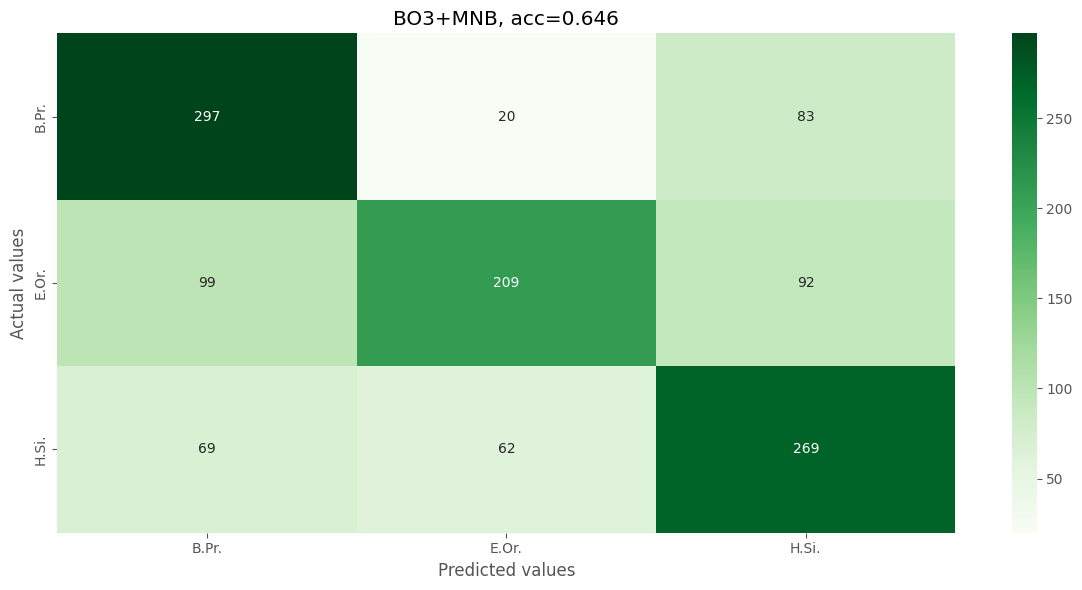

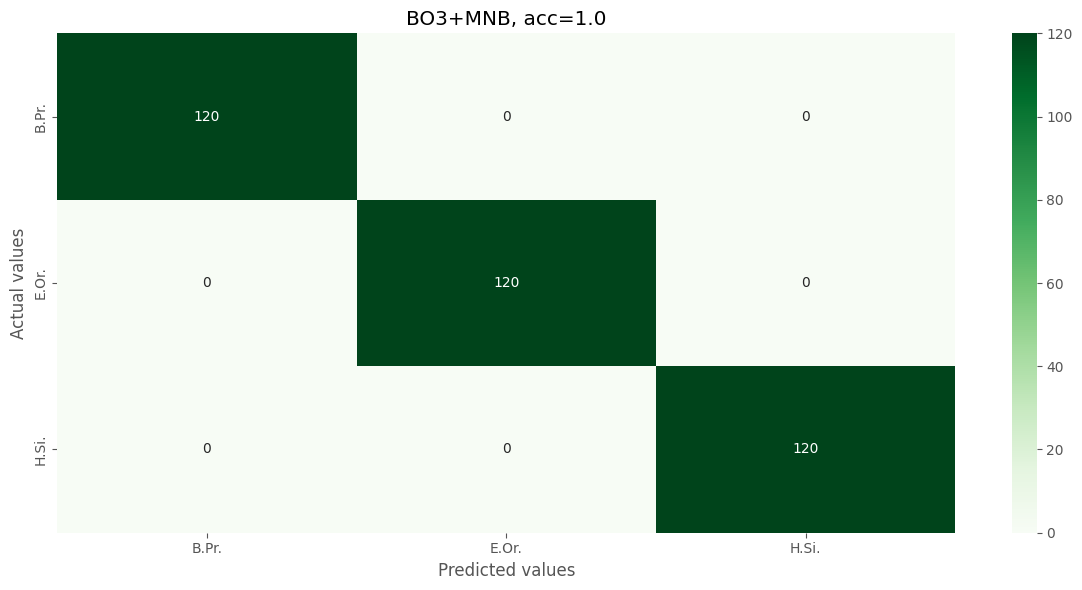

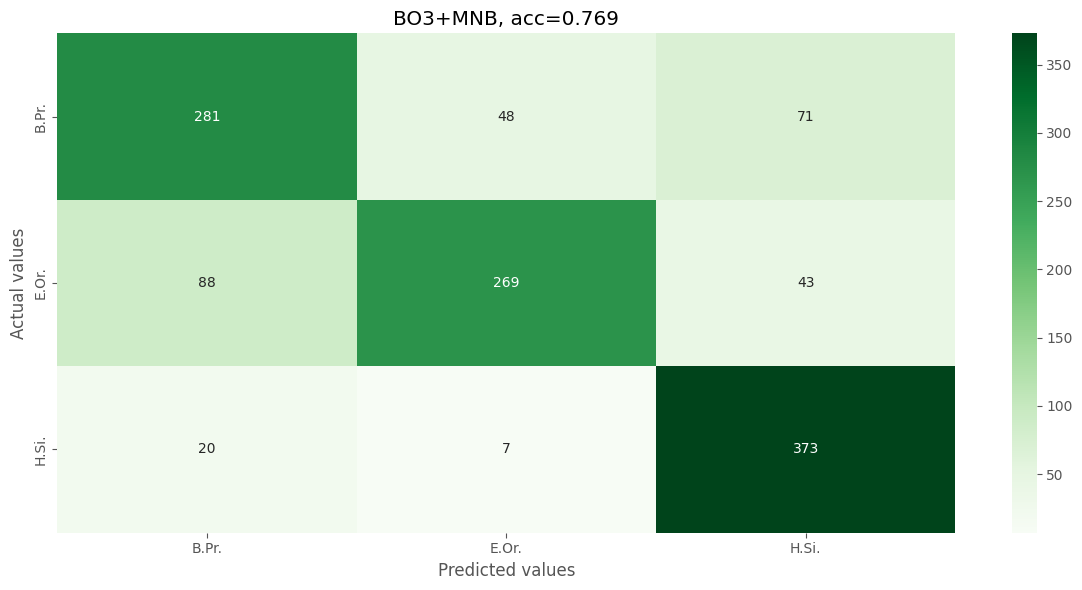

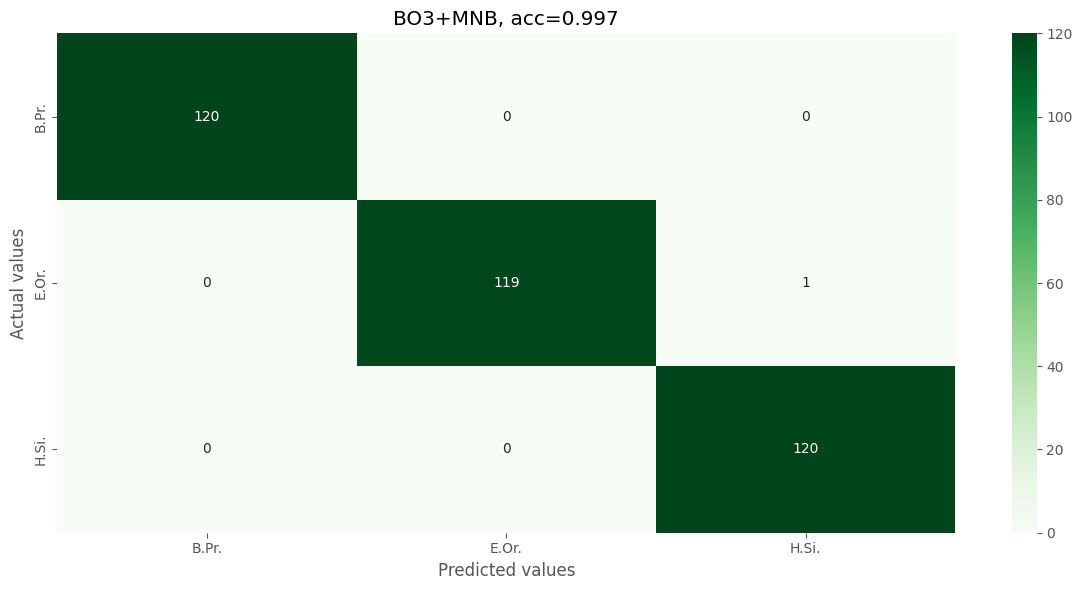

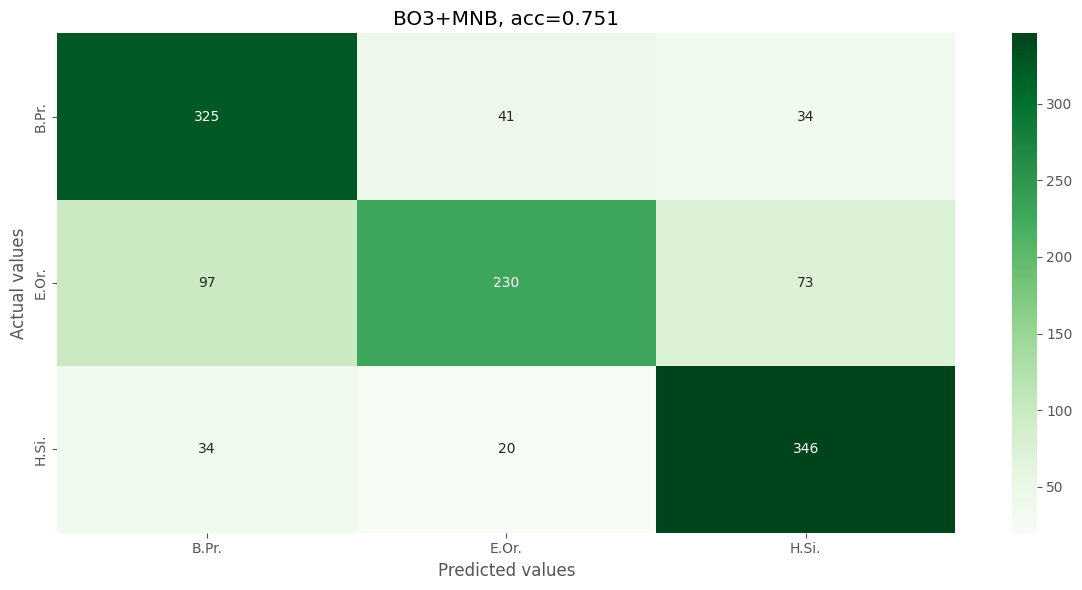

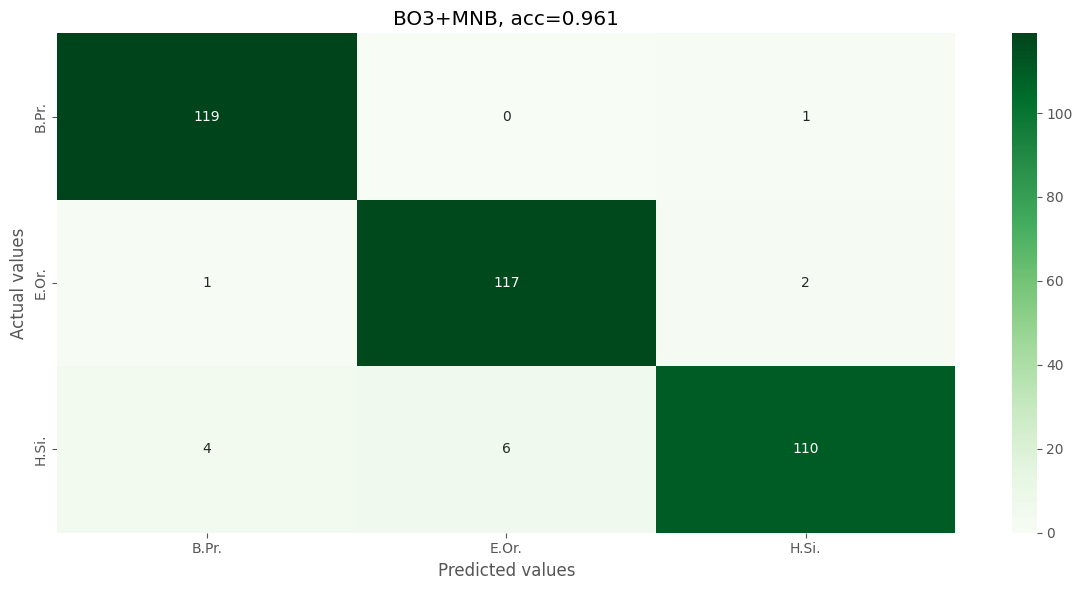

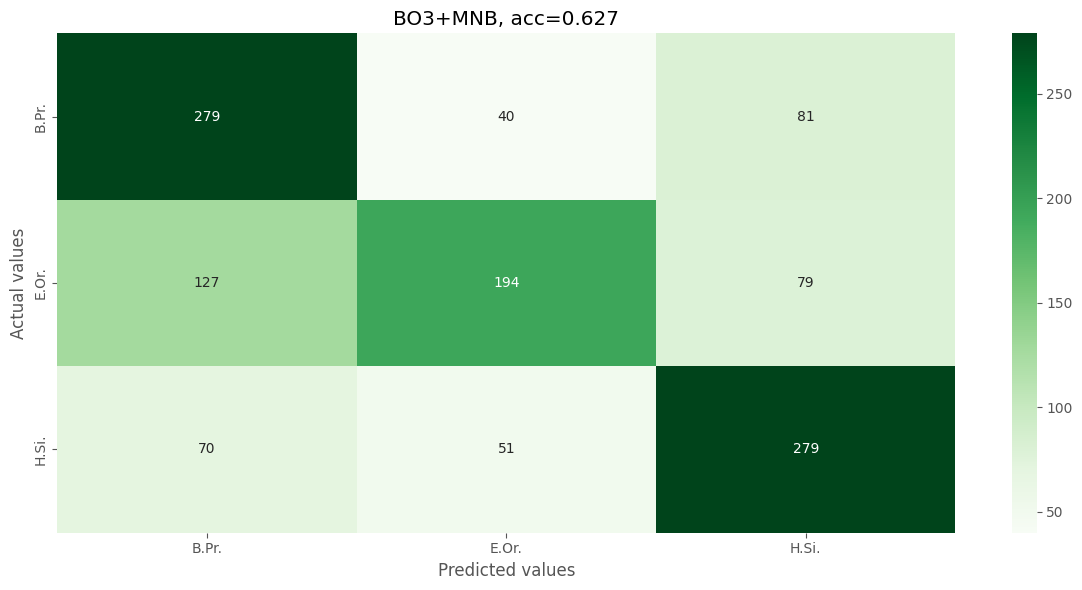

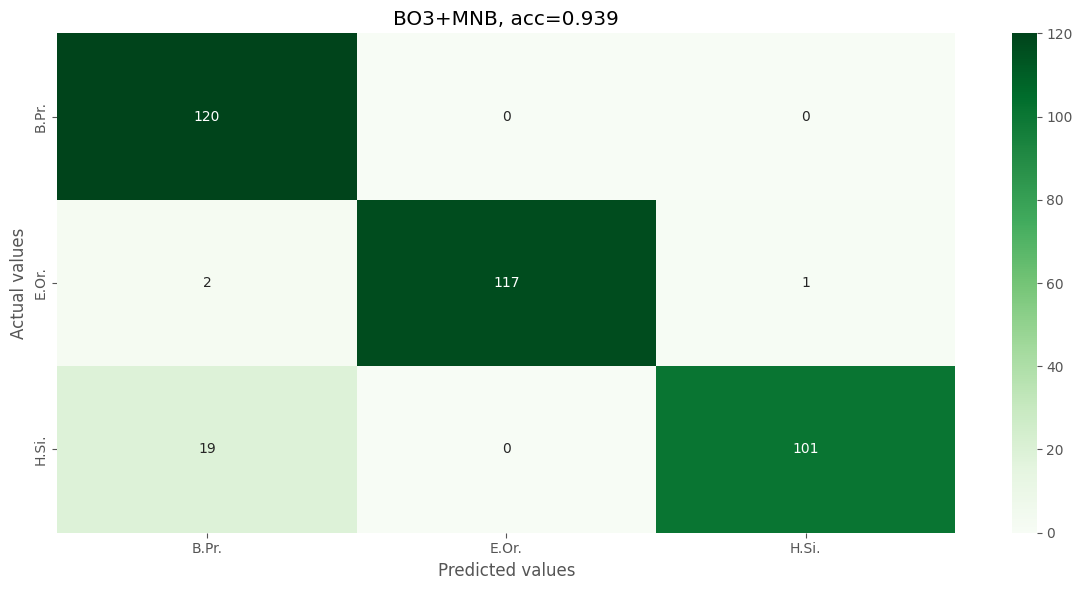

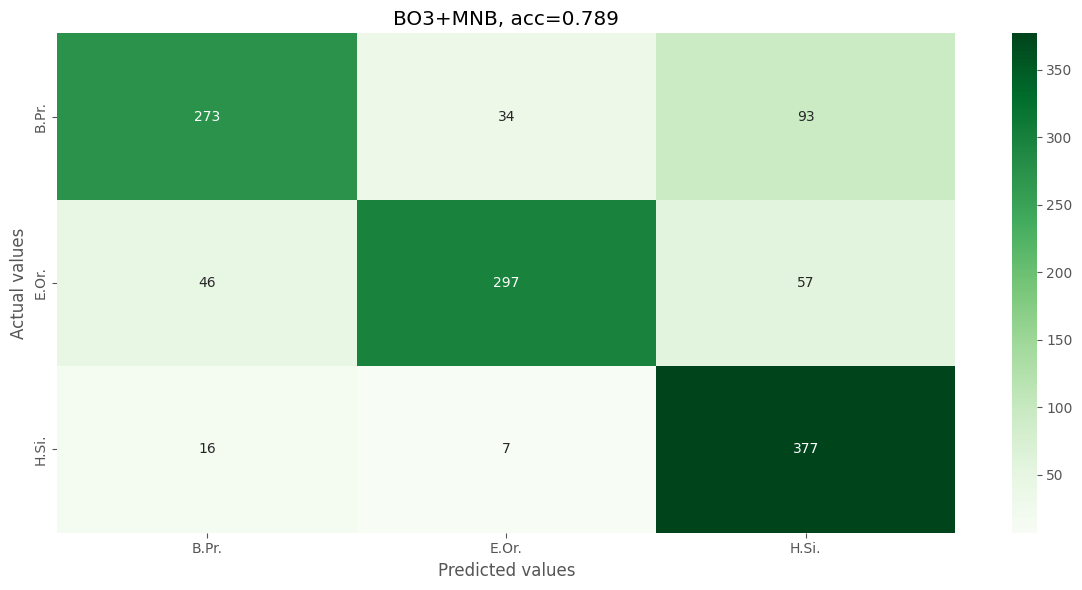

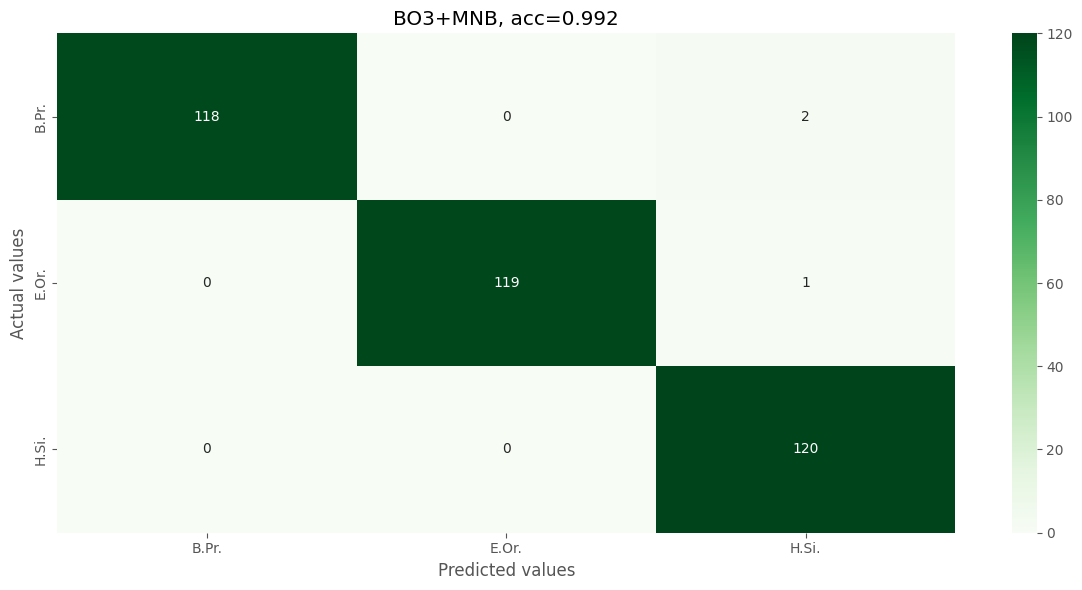

In [ ]:
for p in preps_num:
  for d in div_num:
    number_of_dataset = str(d)+str(p) if d>0 else str(p)
    if d < 5:
      mixed = True
      kinds_descr = 'l'
    else:
      mixed = False
      kinds_descr = 'e'
    latex_set_str = get_latex_set_str(p,d)
    prep_descr = preps_descr[p]
    file_name_read = datasets_filepath + str(number_of_dataset)
    with open(file_name_read, 'rb') as f:
      data = pickle.load(f)
      head_data, train_set, train_classes, test_set, test_classes = data
      test_size, train_size, words_num_in_par, preprocessing_list, authors = head_data
    print(get_books_epoch_list())
    run_pipeline()